### Eviction Data Analysis for New Mexico

Dependencies that this project requires are:
- `xlrd`
- `pandas`
- `jupyter`
- `matplotlib`
- `xlrd`


This notebook does the following: 
- clean names of evictors
- aggegregates data by largest evictors

In [33]:
import sys
import glob
import datetime 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Open and explore data
- open data using `read_csv()` function
- explore data using `.head()` function and get an overview of the data using `.columns`

In [34]:
# import data 
temp_dataframe = pd.read_csv('allCases_2010_2021_Until_9.1.21_anonymized.csv')

In [35]:
# set datatype parameters
dtypes = {
    "filename":"str"
}

# create empty DataFrame to hold all evictions
columns = [
#     'Source.Name', 
           'caseNumber', 'filename', 'caseType', 'dateFiled',
       'location', 'judicialOfficer', 
       'plaintiff1'
]

evictions = pd.DataFrame(columns=columns)


In [36]:
evictions.head()

,caseNumber,filename,caseType,dateFiled,location,judicialOfficer,plaintiff1


In [37]:
evictions = pd.concat([evictions, temp_dataframe])
print(len(temp_dataframe), len(evictions))

190428 190428


In [38]:
evictions.columns

Index(['caseNumber', 'filename', 'caseType', 'dateFiled', 'location',
       'judicialOfficer', 'plaintiff1'],
      dtype='object')

In [39]:
evictions.head()

,caseNumber,filename,caseType,dateFiled,location,judicialOfficer,plaintiff1
0,M-7-CV-2010-00002,1629808,Landlord Tenant,2010-01-04,Chaves Magistrate,"De Los Santos, Eugene M.","RAGSDALE, DONALD"
1,M-7-CV-2010-00012,1629939,Landlord Tenant,2010-01-06,Chaves Magistrate,"De Los Santos, Eugene M.","CHADWICK, CHAD"
2,M-7-CV-2010-00014,1629972,Landlord Tenant,2010-01-07,Chaves Magistrate,"De Los Santos, Eugene M.","CHADWICK, CHAD"
3,M-7-CV-2010-00028,1630076,Landlord Tenant,2010-01-11,Chaves Magistrate,"De Los Santos, Eugene M.","BARRAZA, PATRICIA"
4,M-7-CV-2010-00030,1630081,Landlord Tenant,2010-01-11,Chaves Magistrate,"De Los Santos, Eugene M.",SOUTHBROOK APARTMENTS


#### Filter out irrelevant cases:

- `Landlord Tenant`, `Mobile Home Park`, `Forcible Detainer`, and `Interpleader` are the types of cases that Samuel Taub, a law student at University of New Mexico, is using to track evictions. He describes that methodology here https://www.nmevictions.org/?page_id=903.  

In [40]:
evictions["caseType"].value_counts()

Landlord Tenant      175343
Mobile Home Park      11438
Forcible Detainer      2245
Forcible Entry         1343
General Civil            48
Interpleader             11
Name: caseType, dtype: int64

In [41]:
len(evictions)

190428

In [42]:
eviction_categories = ["Landlord Tenant", "Mobile Home Park", "Forcible Detainer", "Interpleader"]

evictions = evictions[ 
    evictions["caseType"].isin(eviction_categories)
]


In [43]:
len(evictions)

189037

In [44]:
evictions.columns

Index(['caseNumber', 'filename', 'caseType', 'dateFiled', 'location',
       'judicialOfficer', 'plaintiff1'],
      dtype='object')

#### Clean data

- clean `plaintiff1` column (lower case everything, replace some common issues)
- replace names of plaintiffs based on manual corrections done by New Mexico Searchlight reporter. 

In [45]:
evictions["plaintiff1"] = evictions["plaintiff1"].astype(str)
evictions["plaintiff1_cleaned"] = evictions["plaintiff1"].apply( lambda x: x.lower().replace("&","and").strip())

evictions.head()

,caseNumber,filename,caseType,dateFiled,location,judicialOfficer,plaintiff1,plaintiff1_cleaned
0,M-7-CV-2010-00002,1629808,Landlord Tenant,2010-01-04,Chaves Magistrate,"De Los Santos, Eugene M.","RAGSDALE, DONALD","ragsdale, donald"
1,M-7-CV-2010-00012,1629939,Landlord Tenant,2010-01-06,Chaves Magistrate,"De Los Santos, Eugene M.","CHADWICK, CHAD","chadwick, chad"
2,M-7-CV-2010-00014,1629972,Landlord Tenant,2010-01-07,Chaves Magistrate,"De Los Santos, Eugene M.","CHADWICK, CHAD","chadwick, chad"
3,M-7-CV-2010-00028,1630076,Landlord Tenant,2010-01-11,Chaves Magistrate,"De Los Santos, Eugene M.","BARRAZA, PATRICIA","barraza, patricia"
4,M-7-CV-2010-00030,1630081,Landlord Tenant,2010-01-11,Chaves Magistrate,"De Los Santos, Eugene M.",SOUTHBROOK APARTMENTS,southbrook apartments


In [46]:
plaintiff_walkover = pd.read_csv("../data/walkover_cleaned_names.csv", dtype = {"unified_name": "str"} )

plaintiff_walkover.head()

,plaintiff1_cleaned,unified_name
0,t and c management,t and c management
1,sky management inc,"sky management, inc."
2,core vistas at seven bar ranch,core vistas at seven bar ranch
3,cwr residential llc doing business as cotton...,cottonwood ranch
4,mountain vista,mountain vista


In [47]:
evictions_cleaned = pd.merge(
        evictions,
        plaintiff_walkover,
        on = "plaintiff1_cleaned",
        how = "left"
)



evictions_cleaned.head()

,caseNumber,filename,caseType,dateFiled,location,judicialOfficer,plaintiff1,plaintiff1_cleaned,unified_name
0,M-7-CV-2010-00002,1629808,Landlord Tenant,2010-01-04,Chaves Magistrate,"De Los Santos, Eugene M.","RAGSDALE, DONALD","ragsdale, donald",NaN
1,M-7-CV-2010-00012,1629939,Landlord Tenant,2010-01-06,Chaves Magistrate,"De Los Santos, Eugene M.","CHADWICK, CHAD","chadwick, chad","chadwick, chad"
2,M-7-CV-2010-00014,1629972,Landlord Tenant,2010-01-07,Chaves Magistrate,"De Los Santos, Eugene M.","CHADWICK, CHAD","chadwick, chad","chadwick, chad"
3,M-7-CV-2010-00028,1630076,Landlord Tenant,2010-01-11,Chaves Magistrate,"De Los Santos, Eugene M.","BARRAZA, PATRICIA","barraza, patricia",NaN
4,M-7-CV-2010-00030,1630081,Landlord Tenant,2010-01-11,Chaves Magistrate,"De Los Santos, Eugene M.",SOUTHBROOK APARTMENTS,southbrook apartments,NaN


In [48]:
evictions_cleaned["unified_name"] = np.where(
    ~evictions_cleaned['unified_name'].isnull(),
    evictions_cleaned['unified_name'],
    evictions_cleaned['plaintiff1_cleaned']
)

evictions_cleaned.head()

,caseNumber,filename,caseType,dateFiled,location,judicialOfficer,plaintiff1,plaintiff1_cleaned,unified_name
0,M-7-CV-2010-00002,1629808,Landlord Tenant,2010-01-04,Chaves Magistrate,"De Los Santos, Eugene M.","RAGSDALE, DONALD","ragsdale, donald","ragsdale, donald"
1,M-7-CV-2010-00012,1629939,Landlord Tenant,2010-01-06,Chaves Magistrate,"De Los Santos, Eugene M.","CHADWICK, CHAD","chadwick, chad","chadwick, chad"
2,M-7-CV-2010-00014,1629972,Landlord Tenant,2010-01-07,Chaves Magistrate,"De Los Santos, Eugene M.","CHADWICK, CHAD","chadwick, chad","chadwick, chad"
3,M-7-CV-2010-00028,1630076,Landlord Tenant,2010-01-11,Chaves Magistrate,"De Los Santos, Eugene M.","BARRAZA, PATRICIA","barraza, patricia","barraza, patricia"
4,M-7-CV-2010-00030,1630081,Landlord Tenant,2010-01-11,Chaves Magistrate,"De Los Santos, Eugene M.",SOUTHBROOK APARTMENTS,southbrook apartments,southbrook apartments


In [49]:
top_evictors_all_time = evictions_cleaned.groupby(
                ["plaintiff1_cleaned"]
            ).agg(
                {
                    "caseNumber":"count"
                }
            ).sort_values(
                by="caseNumber",
                ascending=False
).reset_index()

# export
top_evictors_all_time.to_csv("../output/top_evictors_for_cleaning.csv", index=False)

top_evictors_all_time.head(40)

,plaintiff1_cleaned,caseNumber
0,t and c management,2115
1,sky management inc,974
2,core vistas at seven bar ranch,935
3,cwr residential llc doing business as cotton...,853
4,mountain vista,828
5,arioso apartments,801
6,lucaya apartments,791
7,academy terrace,781
8,bluewater village apartments,776
9,manzano vista apartments,774


### Aggregate data by year and since the pandemic
this part of the notebook will produce:
- tallies
    - evictions by evictor
    - top evictors since the pandemic started
- a resampled timeline
    - evictions over time for all years
    - evictions over time since the pandemic started


### Aggregate data for all years 
- aggregate data using [`.groupby()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)
- export it for some manual review Sheets for potential issues 

In [50]:
top_evictors_all_time = evictions_cleaned.groupby(
                ["unified_name"]
            ).agg(
                {
                    "caseNumber":"count"
                }
            ).sort_values(
                by="caseNumber",
                ascending=False
).reset_index()

# export
top_evictors_all_time.to_csv("../output/top_evictors_all_time.csv", index=False)

top_evictors_all_time.head(50)


,unified_name,caseNumber
0,"sky management, inc.",2616
1,t and c management,2464
2,cottonwood ranch,1349
3,sun village apartments,1302
4,sun pointe park apartments,1240
5,core vistas at seven bar ranch,1178
6,monarch properties,1177
7,tierra west estates,1054
8,whispering sands apartments,991
9,cinnamon tree apartments,937


In [51]:
top_evictors_all_time[top_evictors_all_time["unified_name"] == "nan"]

,unified_name,caseNumber
445,nan,51


In [52]:
# export listings without a plaintiff for error checking
evictions_cleaned[evictions_cleaned["plaintiff1_cleaned"] == "nan"].to_csv("../output/evictions_nanvalues.csv", index=False)

### Top Evictors Since mid March 2020
We're setting the beginning of the pandemic to be March 11, when the first cases were [announced in the state](https://www.krqe.com/health/coronavirus-resources/timeline-coronavirus-in-new-mexico/).

In [53]:
evictions_since_pandemic = evictions_cleaned[
            (evictions_cleaned["dateFiled"].dt.date >= datetime.date(2020,3,11))
    ]

top_pandemic_evictors = evictions_since_pandemic.groupby(
                ["unified_name"]
            ).agg(
                {
                    "caseNumber":"count"
                }
            ).sort_values(
                by="caseNumber",
                ascending=False
).reset_index()

top_pandemic_evictors.to_csv("../output/top_pandemic_evictors.csv", index=False)

top_pandemic_evictors.head(20)

AttributeError: Can only use .dt accessor with datetimelike values

### Resampled timeline
evictions over time for all years
evictions over time since the pandemic started

In [ ]:
evictions_cleaned.head()

,caseNumber,filename,caseType,dateFiled,location,judicialOfficer,plaintiff1,plaintiff1_cleaned,unified_name
0,M-7-CV-2010-00002,1629808,Landlord Tenant,2010-01-04,Chaves Magistrate,"De Los Santos, Eugene M.","RAGSDALE, DONALD","ragsdale, donald","ragsdale, donald"
1,M-7-CV-2010-00012,1629939,Landlord Tenant,2010-01-06,Chaves Magistrate,"De Los Santos, Eugene M.","CHADWICK, CHAD","chadwick, chad","chadwick, chad"
2,M-7-CV-2010-00014,1629972,Landlord Tenant,2010-01-07,Chaves Magistrate,"De Los Santos, Eugene M.","CHADWICK, CHAD","chadwick, chad","chadwick, chad"
3,M-7-CV-2010-00028,1630076,Landlord Tenant,2010-01-11,Chaves Magistrate,"De Los Santos, Eugene M.","BARRAZA, PATRICIA","barraza, patricia","barraza, patricia"
4,M-7-CV-2010-00030,1630081,Landlord Tenant,2010-01-11,Chaves Magistrate,"De Los Santos, Eugene M.",SOUTHBROOK APARTMENTS,southbrook apartments,southbrook apartments


In [ ]:
evictions_cleaned.columns

Index(['caseNumber', 'filename', 'caseType', 'dateFiled', 'location',
       'judicialOfficer', 'plaintiff1', 'plaintiff1_cleaned', 'unified_name'],
      dtype='object')

#### Evictions tallies
- per year 
- per year and evictor

In [ ]:
yearly_evictions = evictions_cleaned.resample('Y', on='dateFiled').agg({"filename":"count"})
yearly_evictions.reset_index().to_csv("../output/yearly_evictions.csv", index=False)

yearly_evictions

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
%%time
monthly_evictions = evictions_cleaned.resample('M', on='dateFiled').agg({"filename":"count"})
monthly_evictions.reset_index().to_csv("../output/monthly_evictions.csv", index=False)
monthly_evictions

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

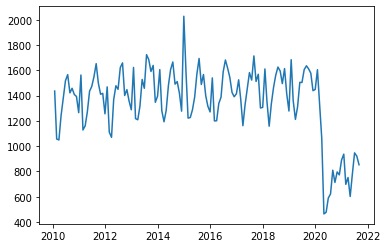

In [ ]:
plt.plot(monthly_evictions)

#### Monthly evictions since the pandemic

This data is for the chart and will include Tallies for January and February as well:

In [ ]:

monthly_evictions_pandemic = evictions_cleaned[
            (evictions_cleaned["dateFiled"].dt.date >= datetime.date(2020,1,1))
    ].resample(
        'M', on='dateFiled'
    ).agg(
        {"filename":"count"}
)

monthly_evictions_pandemic.reset_index().to_csv("../output/monthly_evictions_pandemic.csv", index=False)

monthly_evictions_pandemic.head()


,filename
dateFiled,
2020-01-31,1605
2020-02-29,1338
2020-03-31,1061
2020-04-30,464
2020-05-31,477


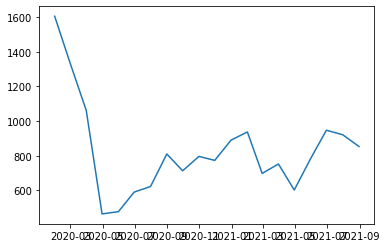

In [ ]:
plt.plot(monthly_evictions_pandemic)

In [ ]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [ ]:
evictions_cleaned["year"] = pd.DatetimeIndex(evictions_cleaned["dateFiled"]).year
evictions_cleaned["year"].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year, dtype: int64

In [ ]:
evictions_by_plaintiff_by_year = evictions_cleaned.groupby(
    ["year","unified_name"]
).agg(
    {"caseNumber": "count"}
).reset_index()

evictions_by_plaintiff_by_year.head()

,year,unified_name,caseNumber
0,2010,201 alvarado apartments,1
1,2010,2200 grande llc,2
2,2010,3900 w cornelia llc,1
3,2010,3900 w cornelia llc dba ortiz apts,2
4,2010,3900 w cornelia llc doing business as ortiz ...,14


In [ ]:
evictions_by_plaintiff_by_year.dtypes

year             int64
unified_name    object
caseNumber       int64
dtype: object

In [ ]:
evictors_50plus_peryear = evictions_by_plaintiff_by_year[
    evictions_by_plaintiff_by_year["caseNumber"] >= 50
].sort_values(
    by = ["year", "caseNumber"],
    ascending = False
)

evictors_50plus_peryear.to_csv("../output/evictors_50plus_peryear.csv", index=False)

In [ ]:
evictors_50plus_peryear.head(100)

,year,unified_name,caseNumber
50052,2021,"4fmi, llc",103
50513,2021,cinnamon tree apartments,92
51455,2021,monarch properties,88
52173,2021,t and c management,87
52144,2021,sun pointe park apartments,67
...,...,...,...
38740,2018,diamond mesa,117
40300,2018,mountain vista,109
38919,2018,entrada pointe,107
41723,2018,tierra pointe apartments,106


In [ ]:
evictions_by_plaintiff_by_year.dtypes

year             int64
unified_name    object
caseNumber       int64
dtype: object